<a href="https://colab.research.google.com/github/kaljuvee/datascience/blob/master/notebooks/stats/timeseries/sector_payments_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

**Steps:**

1. Read in data from Github
2. Fill NaN values horizontally / per row with averages
3. There are 8500+ clients but we will combine them into 27 categories by grouping by Business Description and taking the group average
4. For each group, we will make 1 year / 12 predition using Facebook Prophet API

In [3]:
# Load file from Github
file_path = 'https://raw.githubusercontent.com/kaljuvee/datascience/master/notebooks/alternative_data/data/'
input_file = 'historical_payments.xlsx'

payments_df = pd.read_excel(file_path + input_file, sheet_name='20201020_YL_DS_Analysis_RawPaym')
payments_df

,customer_id,BusinessDescription,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
0,1,Personal Service Providers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2620.00,2014.00,2470.00,2425.00,2333.00,2312.00,2116.00,2232.50,2483.00,2631.01,2190.00,2641.00,2649.00,2552.00,2503.00,2497.00,2648.00
1,2,Home Furnishings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6680.00,11045.00,17772.00,12581.75,8983.00,5654.00,4211.00,6090.00,16726.00,7570.00,14294.00,12556.12,13080.00,12368.00,14529.00,15025.00,11331.72
2,3,Personal Service Providers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4672.50,5037.50,6325.00,4184.40,3966.50,4687.50,4360.00,5347.52,5400.00,5930.00,4741.50,4937.50,6467.50,3057.50,4392.50,3740.00,4490.00
3,4,Miscellaneous Retail,10086.41,4289.1,5978.51,12059.19,9366.59,6810.36,8132.02,12587.29,6523.00,4062.85,4427.10,6322.90,4777.02,4654.04,4134.32,6968.70,9056.44,9646.57,8949.74,6204.74,6432.15,4640.36,4495.51,3839.95,3294.65,6808.65,6216.58,6145.26,5752.25,6548.81,7472.93,9206.88,7389.55,4247.18,3080.34,2994.01
4,5,Hotels & Motels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3989.00,7003.15,7935.50,6455.50,13274.15,11425.65,5404.00,2218.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,8146,Repair Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54419.96,31459.65,28769.43,31121.85,37676.40,45303.21,39771.00,45319.69,33318.53,44135.61,30801.55,39649.71,45673.60,59715.44,38725.89,42021.99,62646.28,46074.08,50520.40,42772.06,43253.41,56803.60,65030.20,49185.36,61210.54,51790.18,39471.33
8146,8147,Restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8639.38,11289.33,7954.03,9474.34,8833.36,15002.25,12188.77,12298.36,14994.00,15347.82,12079.65,8119.15,8585.20,8242.25
8147,8148,Restaurants,NaN,NaN,NaN,NaN,17146.93,13774.77,18410.31,27288.31,17095.26,16259.99,7532.76,4874.53,4087.89,6212.97,4299.61,12265.22,11824.55,13124.17,15928.45,21332.15,13102.59,14158.45,4687.95,3781.20,2506.15,4988.75,5050.94,10841.74,10459.30,10540.70,12403.68,18020.97,13540.65,10325.13,5909.40,4553.20
8148,8149,Restaurants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37806.55,48689.95,42248.68,52710.60,45333.15,47590.76,44812.90,53077.80,47010.14,39043.75,43190.53,44734.41,48128.78,47560.68,46389.15,58597.44


In [4]:
# take average of each row and fill the missing values
payments_df = payments_df.T.fillna(payments_df.mean(axis=1), axis=0).T
payments_df

,customer_id,BusinessDescription,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
0,1,Personal Service Providers,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2295.42,2620,2014,2470,2425,2333,2312,2116,2232.5,2483,2631.01,2190,2641,2649,2552,2503,2497,2648
1,2,Home Furnishings,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,10583.3,6680,11045,17772,12581.8,8983,5654,4211,6090,16726,7570,14294,12556.1,13080,12368,14529,15025,11331.7
2,3,Personal Service Providers,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4541.13,4672.5,5037.5,6325,4184.4,3966.5,4687.5,4360,5347.52,5400,5930,4741.5,4937.5,6467.5,3057.5,4392.5,3740,4490
3,4,Miscellaneous Retail,10086.4,4289.1,5978.51,12059.2,9366.59,6810.36,8132.02,12587.3,6523,4062.85,4427.1,6322.9,4777.02,4654.04,4134.32,6968.7,9056.44,9646.57,8949.74,6204.74,6432.15,4640.36,4495.51,3839.95,3294.65,6808.65,6216.58,6145.26,5752.25,6548.81,7472.93,9206.88,7389.55,4247.18,3080.34,2994.01
4,5,Hotels & Motels,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,6412.22,3989,7003.15,7935.5,6455.5,13274.1,11425.6,5404,2218,6412.22,6412.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,8146,Repair Services,43742.4,43742.4,43742.4,43742.4,43742.4,43742.4,43742.4,43742.4,43742.4,54420,31459.7,28769.4,31121.8,37676.4,45303.2,39771,45319.7,33318.5,44135.6,30801.5,39649.7,45673.6,59715.4,38725.9,42022,62646.3,46074.1,50520.4,42772.1,43253.4,56803.6,65030.2,49185.4,61210.5,51790.2,39471.3
8146,8147,Restaurants,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,10746.3,8639.38,11289.3,7954.03,9474.34,8833.36,15002.2,12188.8,12298.4,14994,15347.8,12079.6,8119.15,8585.2,8242.25
8147,8148,Restaurants,11044.7,11044.7,11044.7,11044.7,17146.9,13774.8,18410.3,27288.3,17095.3,16260,7532.76,4874.53,4087.89,6212.97,4299.61,12265.2,11824.5,13124.2,15928.5,21332.2,13102.6,14158.5,4687.95,3781.2,2506.15,4988.75,5050.94,10841.7,10459.3,10540.7,12403.7,18021,13540.6,10325.1,5909.4,4553.2
8148,8149,Restaurants,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,44416.1,37806.6,48689.9,42248.7,52710.6,45333.2,47590.8,44812.9,53077.8,47010.1,39043.8,43190.5,44734.4,48128.8,47560.7,46389.2,58597.4


In [5]:
# average across groups and drop extra columns
to_average = list(payments_df.columns)
to_average.remove('customer_id')
to_average.remove('BusinessDescription')
payments_df[to_average] = payments_df[to_average].astype('float32')
payments_df_groups = payments_df.groupby('BusinessDescription').mean()

In [6]:
# we should now have one row per sector
payments_df_groups

,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
BusinessDescription,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Amusement & Entertainment,12983.921875,12119.195312,12519.979492,14124.787109,13696.073242,13125.055664,13083.320312,14542.605469,12422.389648,12108.129883,11784.734375,11790.763672,11786.891602,12665.335938,12719.353516,14235.353516,14620.647461,13150.143555,13366.544922,14952.581055,12433.384766,11907.133789,11218.393555,11666.180664,12757.652344,13174.878906,14103.865234,17089.775391,15999.226562,13618.161133,15425.625000,16962.552734,13199.470703,12414.531250,11092.083984,11659.780273
Auto & Vehicle Services,23885.517578,23820.148438,24301.595703,23850.847656,24056.835938,24080.126953,23845.066406,23490.142578,23659.472656,23407.478516,23285.000000,22433.601562,23452.990234,22979.337891,25452.128906,24699.554688,26008.060547,24670.435547,24446.279297,25363.312500,24666.589844,25720.951172,23231.119141,21145.644531,26700.302734,24562.306641,26794.365234,26091.099609,26654.375000,24883.650391,27667.572266,26626.146484,24805.015625,26937.929688,24898.906250,20764.048828
Business Services,14697.278320,14666.949219,14796.698242,14643.970703,14665.856445,14668.758789,14689.241211,14635.214844,14425.433594,14362.416016,14392.678711,13480.314453,14120.404297,14009.803711,14571.921875,14581.160156,15538.817383,15172.015625,15239.535156,15214.375000,14924.196289,15175.640625,15331.497070,14072.440430,14741.514648,14382.541016,17804.763672,15786.222656,16788.468750,15597.999023,16654.181641,16536.652344,15860.695312,17162.001953,16711.863281,13473.583008
Car Rental,12784.723633,11985.076172,12808.524414,13257.175781,12425.836914,12308.397461,13205.596680,14370.685547,12907.962891,12823.807617,13518.707031,12929.364258,11997.049805,12431.567383,13035.928711,12727.031250,12008.461914,12408.056641,12543.265625,12844.524414,12447.652344,12777.506836,12864.305664,12635.441406,12602.118164,9835.251953,13937.300781,14905.026367,14323.634766,13359.812500,16471.988281,14734.310547,12609.526367,13361.869141,12358.294922,11874.041992
Clothing Stores,14129.640625,13894.149414,14097.848633,14039.954102,13967.141602,14325.359375,14364.187500,14389.421875,14292.802734,14170.211914,14139.319336,14776.712891,13210.486328,13055.762695,14027.472656,14070.945312,14329.581055,14806.042969,14857.724609,15406.181641,14717.169922,14665.473633,13832.748047,15403.097656,12695.701172,11971.374023,14230.666992,14537.083008,15276.782227,14651.191406,15835.461914,17099.199219,14245.112305,14929.117188,14854.894531,15253.852539
Contracted Services,20142.498047,20246.281250,20459.992188,20489.507812,20419.080078,20491.914062,20355.660156,20644.855469,19802.722656,19973.656250,20299.689453,18477.378906,19568.156250,19144.589844,19621.072266,20477.195312,21434.181641,20890.304688,21332.554688,21732.683594,21430.738281,22023.187500,20963.228516,19389.697266,18804.519531,19139.126953,22098.892578,22298.433594,23142.898438,21544.970703,23742.548828,22887.324219,21283.164062,23823.687500,21991.572266,18443.570312
Department Stores,9677.940430,9677.940430,9677.940430,9677.940430,9600.770508,9707.465820,9603.383789,9682.833008,9396.314453,9587.392578,9778.048828,9766.857422,9359.000977,9408.196289,9593.906250,8808.000000,9497.989258,10265.957031,10355.716797,11372.478516,9556.004883,9889.176758,9941.390625,7941

In [7]:
# let's transpose the dataframe so the time series becomes and index
payments_df_groups.T

BusinessDescription,Amusement & Entertainment,Auto & Vehicle Services,Business Services,Car Rental,Clothing Stores,Contracted Services,Department Stores,Fuel,Government Services,Home Furnishings,Hotels & Motels,Hotels & Motels,Mail Order/Teleophone Order Providers,Miscellaneous Retail,Personal Retail,Personal Service Providers,Pharmacy,Professional Services & Membership Organizations,Repair Services,Restaurants,Retail - Other Retail,Service Providers,Supermarket & Food,Transportation,Utilities,Wholesale Clubs,Wholesale Distributors & Manufacturers
2017-01-01 00:00:00,12983.921875,23885.517578,14697.278320,12784.723633,14129.640625,20142.498047,9677.940430,13524.630859,15268.590820,20099.429688,28727.240234,5354.541504,27868.179688,12472.898438,25014.314453,10273.342773,7521.665039,15527.869141,15736.867188,15928.732422,23807.025391,20916.814453,14590.983398,13743.442383,16119.876953,34329.894531,17247.691406
2017-02-01 00:00:00,12119.195312,23820.148438,14666.949219,11985.076172,13894.149414,20246.281250,9677.940430,13524.630859,15268.590820,19636.035156,27356.550781,5354.541504,27868.179688,12398.566406,24961.179688,10202.776367,7491.165527,15439.683594,15671.366211,15818.941406,23746.134766,20694.601562,14516.804688,13398.968750,16119.876953,39154.023438,17101.812500
2017-03-01 00:00:00,12519.979492,24301.595703,14796.698242,12808.524414,14097.848633,20459.992188,9677.940430,13524.630859,15268.590820,20385.826172,27777.927734,3169.149902,27868.179688,12482.707031,24962.138672,10356.664062,7519.851562,15704.003906,15898.542969,15866.788086,23836.812500,20923.546875,14468.096680,13513.082031,16119.876953,39589.746094,17218.416016
2017-04-01 00:00:00,14124.787109,23850.847656,14643.970703,13257.175781,14039.954102,20489.507812,9677.940430,13492.693359,15268.590820,19899.910156,28926.240234,4960.100098,35483.886719,12416.703125,24892.447266,10165.043945,7378.294922,15381.444336,15635.111328,15992.743164,24272.593750,20737.453125,14423.288086,13442.259766,16119.876953,38007.105469,17021.033203
2017-05-01 00:00:00,13696.073242,24056.835938,14665.856445,12425.836914,13967.141602,20419.080078,9600.770508,13694.643555,15268.590820,19691.843750,29087.828125,6682.750000,40601.839844,12411.962891,24954.017578,10212.591797,7438.804199,15622.138672,15742.392578,15960.410156,24357.798828,20112.435547,14388.019531,13675.848633,16445.677734,39171.175781,16997.578125
2017-06-01 00:00:00,13125.055664,24080.126953,14668.758789,12308.397461,14325.359375,20491.914062,9707.465820,13744.875977,15268.590820,19479.203125,30254.437500,4666.850098,30235.003906,12362.889648,24958.105469,10275.608398,7399.807617,15663.091797,15811.454102,15790.289062,24195.576172,20638.488281,14375.270508,13762.471680,16039.835938,41630.789062,17278.693359
2017-07-01 00:00:00,13083.320312,23845.066406,14689.241211,13205.596680,14364.187500,20355.660156,9603.383789,13306.137695,15268.590820,19938.431641,30747.988281,4204.399902,23948.394531,12504.950195,25534.095703,10354.697266,7449.850098,15513.054688,15705.470703,16302.938477,23953.443359,21217.273438,14389.764648,13678.551758,18481.955078,40811.718750,17411.759766
2017-08-01 00:00:00,14542.605469,23490.142578,14635.214844,14370.685547,14389.421875,20644.855469,9682.833008,13965.064453,14579.771484,20142.441406,30309.484375,6363.950195,27478.882812,12562.361328,24703.802734,10416.195312,7374.392090,15554.737305,15692.197266,16442.351562,24141.765625,21310.927734,14451.042969,13858.025391,17619.699219,43624.363281,17293.019531
2017-09-01 00:00:00,12422.389648,23659.472656,14425.433594,12907.962891,14292.802734,19802.722656,9396.314453,13247.229492,13953.757812,20255.748047,28093.652344,5527.700195,34302.843750,12527.742188,24575.726562,10328.210938,7340.402832,15760.283203,15743.732422,15788.805664,23371.519531,20810.160156,14213.671875,13448.057617,15605.641602,40914.683594,17704.859375
2017-10-01 00:00:00,12108.129883,23407.478516,14362.416016,12823.807617,14170.211914,19973.656250,9587.392578,13512.930664,14117.68457

In [8]:
# Assign time index to 'ds' as required by Facebook Prophet API
payments_df_groups = payments_df_groups.T # take care when runing this cell twice, Transpose may fuck it up if it's not in the correct order, if any bug happens just run this cell again :)
payments_df_groups['ds'] = payments_df_groups.index

In [10]:
# now construct the value matrix
payments_df_groups.reset_index(inplace=True, drop=True)
payments_df_groups

BusinessDescription,Amusement & Entertainment,Auto & Vehicle Services,Business Services,Car Rental,Clothing Stores,Contracted Services,Department Stores,Fuel,Government Services,Home Furnishings,Hotels & Motels,Hotels & Motels,Mail Order/Teleophone Order Providers,Miscellaneous Retail,Personal Retail,Personal Service Providers,Pharmacy,Professional Services & Membership Organizations,Repair Services,Restaurants,Retail - Other Retail,Service Providers,Supermarket & Food,Transportation,Utilities,Wholesale Clubs,Wholesale Distributors & Manufacturers,ds
0,12983.921875,23885.517578,14697.278320,12784.723633,14129.640625,20142.498047,9677.940430,13524.630859,15268.590820,20099.429688,28727.240234,5354.541504,27868.179688,12472.898438,25014.314453,10273.342773,7521.665039,15527.869141,15736.867188,15928.732422,23807.025391,20916.814453,14590.983398,13743.442383,16119.876953,34329.894531,17247.691406,2017-01-01
1,12119.195312,23820.148438,14666.949219,11985.076172,13894.149414,20246.281250,9677.940430,13524.630859,15268.590820,19636.035156,27356.550781,5354.541504,27868.179688,12398.566406,24961.179688,10202.776367,7491.165527,15439.683594,15671.366211,15818.941406,23746.134766,20694.601562,14516.804688,13398.968750,16119.876953,39154.023438,17101.812500,2017-02-01
2,12519.979492,24301.595703,14796.698242,12808.524414,14097.848633,20459.992188,9677.940430,13524.630859,15268.590820,20385.826172,27777.927734,3169.149902,27868.179688,12482.707031,24962.138672,10356.664062,7519.851562,15704.003906,15898.542969,15866.788086,23836.812500,20923.546875,14468.096680,13513.082031,16119.876953,39589.746094,17218.416016,2017-03-01
3,14124.787109,23850.847656,14643.970703,13257.175781,14039.954102,20489.507812,9677.940430,13492.693359,15268.590820,19899.910156,28926.240234,4960.100098,35483.886719,12416.703125,24892.447266,10165.043945,7378.294922,15381.444336,15635.111328,15992.743164,24272.593750,20737.453125,14423.288086,13442.259766,16119.876953,38007.105469,17021.033203,2017-04-01
4,13696.073242,24056.835938,14665.856445,12425.836914,13967.141602,20419.080078,9600.770508,13694.643555,15268.590820,19691.843750,29087.828125,6682.750000,40601.839844,12411.962891,24954.017578,10212.591797,7438.804199,15622.138672,15742.392578,15960.410156,24357.798828,20112.435547,14388.019531,13675.848633,16445.677734,39171.175781,16997.578125,2017-05-01
5,13125.055664,24080.126953,14668.758789,12308.397461,14325.359375,20491.914062,9707.465820,13744.875977,15268.590820,19479.203125,30254.437500,4666.850098,30235.003906,12362.889648,24958.105469,10275.608398,7399.807617,15663.091797,15811.454102,15790.289062,24195.576172,20638.488281,14375.270508,13762.471680,16039.835938,41630.789062,17278.693359,2017-06-01
6,13083.320312,23845.066406,14689.241211,13205.596680,14364.187500,20355.660156,9603.383789,13306.137695,15268.590820,19938.431641,30747.988281,4204.399902,23948.394531,12504.950195,25534.095703,10354.697266,7449.850098,15513.054688,15705.470703,16302.938477,23953.443359,21217.273438,14389.764648,13678.551758,18481.955078,40811.718750,17411.759766,2017-07-01
7,14542.605469,23490.142578,14635.214844,14370.685547,14389.421875,20644.855469,9682.833008,13965.064453,14579.771484,20142.441406,30309.484375,6363.950195,27478.882812,12562.361328,24703.802734,10416.195312,7374.392090,15554.737305,15692.197266,16442.351562,24141.765625,21310.927734,14451.042969,13858.025391,17619.699219,43624.363281,17293.019531,2017-08-01
8,12422.389648,23659.472656,14425.433594,12907.962891,14292.802734,19802.722656,9396.314453,13247.229492,13953.757812,20255.748047,28093.652344,5527.700195,34302.843750,12527.742188,24575.726562,10328.210938,7340.402832,15760.283203,15743.732422,15788.805664,23371.519531,20810.160156,14213.671875,13448.057617,15605.641602,40914.683594,17704.859375,2017-09-01
9,12108.129883,23407.478516,14362.416016,12823.807617,14170.211914,19973.656250,9587.392578,13512.930664,14117.684570,20758.091797,27549.285156,6665.600098,28311.644531,12453.350586,24195.533203

In [11]:
# fbprophet makes a single time series prediction, so we need to define for every sector a unique prophet model, let's store those in a dictionary
prophet_models = {}
for sector in list(payments_df_groups.columns):
  if sector=='ds':
    continue
  prophet_models[sector] = Prophet()

print(prophet_models)

{'Amusement & Entertainment': <fbprophet.forecaster.Prophet object at 0x7f320fe84160>, 'Auto & Vehicle Services': <fbprophet.forecaster.Prophet object at 0x7f320fe841d0>, 'Business Services': <fbprophet.forecaster.Prophet object at 0x7f321327d128>, 'Car Rental': <fbprophet.forecaster.Prophet object at 0x7f320fdc65f8>, 'Clothing Stores': <fbprophet.forecaster.Prophet object at 0x7f320fdd5b38>, 'Contracted Services': <fbprophet.forecaster.Prophet object at 0x7f320fdd5cc0>, 'Department Stores': <fbprophet.forecaster.Prophet object at 0x7f320fdd5d68>, 'Fuel': <fbprophet.forecaster.Prophet object at 0x7f320fdd5e10>, 'Government Services': <fbprophet.forecaster.Prophet object at 0x7f320fdd5eb8>, 'Home Furnishings': <fbprophet.forecaster.Prophet object at 0x7f320fdd5f60>, 'Hotels & Motels': <fbprophet.forecaster.Prophet object at 0x7f320fdd5fd0>, 'Hotels & Motels                                                                                                                                    

In [12]:
# now assign the 'y' values to create time series for predictions
future_sectors_sales = {}
for sector in prophet_models:
  temporary_dataframe_sector = payments_df_groups[[sector, 'ds']]
  temporary_dataframe_sector.rename({sector: 'y'}, inplace=True, axis=1)
  prophet_models[sector].fit(temporary_dataframe_sector)
  future_sectors_sales[sector] = prophet_models[sector].make_future_dataframe(periods=12, freq='m')
  future_sectors_sales[sector] = prophet_models[sector].predict(future_sectors_sales[sector])
  #print(payments_df_groups[[sector, 'ds']].values)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonali

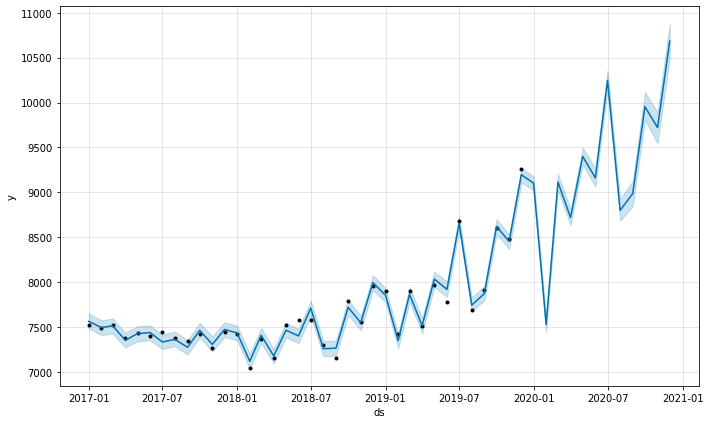

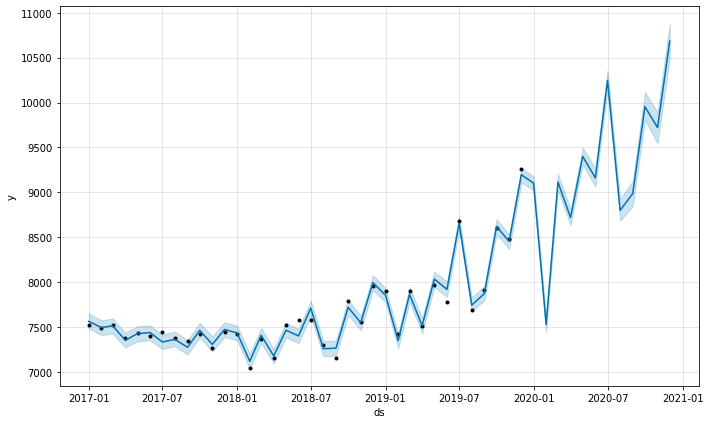

In [13]:
#future_sectors_sales dictionnary will have the predicted values for every sector
"""sectors are: ['Amusement & Entertainment', 'Auto & Vehicle Services',
       'Business Services', 'Car Rental', 'Clothing Stores',
       'Contracted Services', 'Department Stores', 'Fuel',
       'Government Services', 'Home Furnishings', 'Hotels & Motels',
       'Hotels & Motels                                                                                                                                       ',
       'Mail Order/Teleophone Order Providers', 'Miscellaneous Retail',
       'Personal Retail', 'Personal Service Providers', 'Pharmacy',
       'Professional Services & Membership Organizations', 'Repair Services',
       'Restaurants', 'Retail - Other Retail ', 'Service Providers',
       'Supermarket & Food', 'Transportation', 'Utilities', 'Wholesale Clubs',
       'Wholesale Distributors & Manufacturers']"""

sector = 'Pharmacy' # put the sector name here to see the plots
prophet_models[sector].plot(future_sectors_sales[sector])

In [14]:
# Finally inspect the predicted values such as lower / upper bound, and components
future_sectors_sales['Pharmacy']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,7323.990121,7482.838455,7651.795994,7323.990121,7323.990121,241.203459,241.203459,241.203459,241.203459,241.203459,241.203459,0.0,0.0,0.0,7565.193580
1,2017-02-01,7307.802850,7411.618454,7576.813605,7307.802850,7307.802850,187.338853,187.338853,187.338853,187.338853,187.338853,187.338853,0.0,0.0,0.0,7495.141703
2,2017-03-01,7293.182089,7428.381862,7595.873001,7293.182089,7293.182089,221.401069,221.401069,221.401069,221.401069,221.401069,221.401069,0.0,0.0,0.0,7514.583158
3,2017-04-01,7276.994818,7273.811582,7439.137011,7276.994818,7276.994818,75.638153,75.638153,75.638153,75.638153,75.638153,75.638153,0.0,0.0,0.0,7352.632970
4,2017-05-01,7261.329717,7342.818513,7511.922699,7261.329717,7261.329717,167.630924,167.630924,167.630924,167.630924,167.630924,167.630924,0.0,0.0,0.0,7428.960640
5,2017-06-01,7245.142445,7354.661599,7518.653875,7245.142445,7245.142445,193.850218,193.850218,193.850218,193.850218,193.850218,193.850218,0.0,0.0,0.0,7438.992664
6,2017-07-01,7229.477342,7256.924256,7417.969310,7229.477342,7229.477342,105.524527,105.524527,105.524527,105.524527,105.524527,105.524527,0.0,0.0,0.0,7335.001869
7,2017-08-01,7213.281752,7285.616306,7450.116225,7213.281752,7213.281752,149.528410,149.528410,149.528410,149.528410,149.528410,149.528410,0.0,0.0,0.0,7362.810163
8,2017-09-01,7197.086163,7195.296949,7355.261248,7197.086163,7197.086163,78.687810,78.687810,78.687810,78.687810,78.687810,78.687810,0.0,0.0,0.0,7275.773973
9,2017-10-01,7181.413011,7386.595294,7546.209733,7181.413011,7181.413011,283.044216,283.044216,283.044216,283.044216,283.044216,283.044216,0.0,0.0,0.0,7464.457227
